# MNIST Attempt


## Download the MNIST dataset
* Archive of the original website: [http://archive.today/2021.09.01-221543/http://yann.lecun.com/exdb/mnist/](http://archive.today/2021.09.01-221543/http://yann.lecun.com/exdb/mnist/)
    * Train Images: https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz
    * Train Labels: https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz
    * Test Images: https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz
    * Test Labels: https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz

In [13]:
import requests
import os

In [61]:
# URLs for the datasets
train_images_dl: str = "https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz"
train_labels_dl = "https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz"
test_images_dl = "https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz"
test_labels_dl = "https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz"

destination_folder = "./dataset"

def download(url: str, dest_folder: str):
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder) # Create folder

    filename = url.split('/')[-1].replace(" ", "_")
    file_path = os.path.join(dest_folder, filename)

    r = requests.get(url, stream=True)
    if r.ok:
        print("Saving to", os.path.abspath(file_path))
        with open(file_path, "wb") as f:
            for chunk in r.iter_content(chunk_size=1024 * 8):
                if chunk:
                    f.write(chunk)
                    f.flush()
                    os.fsync(f.fileno())
    else: print("Download failed: status code {}\n{}".format(r.status_code, r.text))

    return file_path

In [62]:
# Download datasets
train_images_idx3_fp = download(train_images_dl, destination_folder)
train_labels_idx1_fp = download(train_labels_dl, destination_folder)
t10k_images_idx3_fp = download(test_images_dl, destination_folder)
t10k_labels_idx1_fp = download(test_labels_dl, destination_folder)

Saving to c:\Users\zhangha\Documents\Repositories\MNIST-attempt\dataset\train-images-idx3-ubyte.gz
Saving to c:\Users\zhangha\Documents\Repositories\MNIST-attempt\dataset\train-labels-idx1-ubyte.gz
Saving to c:\Users\zhangha\Documents\Repositories\MNIST-attempt\dataset\t10k-images-idx3-ubyte.gz
Saving to c:\Users\zhangha\Documents\Repositories\MNIST-attempt\dataset\t10k-labels-idx1-ubyte.gz


In [63]:
train_images_idx3_fp,train_labels_idx1_fp,t10k_images_idx3_fp,t10k_labels_idx1_fp

('./dataset\\train-images-idx3-ubyte.gz',
 './dataset\\train-labels-idx1-ubyte.gz',
 './dataset\\t10k-images-idx3-ubyte.gz',
 './dataset\\t10k-labels-idx1-ubyte.gz')

## FILE FORMATS FOR THE MNIST DATABASE
The data is stored in a very simple file format designed for storing vectors and multidimensional matrices. General info on this format is given at the end of this page, but you don't need to read that to use the data files.
All the integers in the files are stored in the MSB first (high endian) format used by most non-Intel processors. Users of Intel processors and other low-endian machines must flip the bytes of the header.
There are 4 files:
```
train-images-idx3-ubyte: training set images
train-labels-idx1-ubyte: training set labels
t10k-images-idx3-ubyte:  test set images
t10k-labels-idx1-ubyte:  test set labels
```
The training set contains 60000 examples, and the test set 10000 examples.
The first 5000 examples of the test set are taken from the original NIST training set. The last 5000 are taken from the original NIST test set. The first 5000 are cleaner and easier than the last 5000.
## TRAINING SET LABEL FILE (train-labels-idx1-ubyte)

| Offset | Type           | Value                   | Description                  |
|--------|--------------|----------------------|------------------------------|
| 0000   | 32 bit integer | 0x00000801 (2049)    | magic number (MSB first)    |
| 0004   | 32 bit integer | 60000                | number of items             |
| 0008   | unsigned byte  | ??                   | label                        |
| 0009   | unsigned byte  | ??                   | label                        |
| ........ | unsigned byte  | ??                   | label                        |
| xxxx   | unsigned byte  | ??                   | label                        |

The labels values are 0 to 9.


## TRAINING SET IMAGE FILE (train-images-idx3-ubyte)

| Offset | Type           | Value                   | Description                  |
|--------|--------------|----------------------|------------------------------|
| 0000   | 32 bit integer | 0x00000803 (2051)    | magic number                 |
| 0004   | 32 bit integer | 60000                | number of images             |
| 0008   | 32 bit integer | 28                   | number of rows               |
| 0012   | 32 bit integer | 28                   | number of columns            |
| 0016   | unsigned byte  | ??                   | pixel                        |
| 0017   | unsigned byte  | ??                   | pixel                        |
| ........ | unsigned byte  | ??                   | pixel                        |
| xxxx   | unsigned byte  | ??                   | pixel                        |

Pixels are organized row-wise. Pixel values are 0 to 255.  
0 means background (white), 255 means foreground (black).


## TEST SET LABEL FILE (t10k-labels-idx1-ubyte)

| Offset | Type           | Value                   | Description                  |
|--------|--------------|----------------------|------------------------------|
| 0000   | 32 bit integer | 0x00000801 (2049)    | magic number (MSB first)    |
| 0004   | 32 bit integer | 10000                | number of items             |
| 0008   | unsigned byte  | ??                   | label                        |
| 0009   | unsigned byte  | ??                   | label                        |
| ........ | unsigned byte  | ??                   | label                        |
| xxxx   | unsigned byte  | ??                   | label                        |

The labels values are 0 to 9.


## TEST SET IMAGE FILE (t10k-images-idx3-ubyte)

| Offset | Type           | Value                   | Description                  |
|--------|--------------|----------------------|------------------------------|
| 0000   | 32 bit integer | 0x00000803 (2051)    | magic number                 |
| 0004   | 32 bit integer | 10000                | number of images             |
| 0008   | 32 bit integer | 28                   | number of rows               |
| 0012   | 32 bit integer | 28                   | number of columns            |
| 0016   | unsigned byte  | ??                   | pixel                        |
| 0017   | unsigned byte  | ??                   | pixel                        |
| ........ | unsigned byte  | ??                   | pixel                        |
| xxxx   | unsigned byte  | ??                   | pixel                        |

Pixels are organized row-wise. Pixel values are 0 to 255.  
0 means background (white), 255 means foreground (black).


In [77]:
import gzip
import struct
import numpy as np
import matplotlib as plt

# Credits: https://stackoverflow.com/questions/39969045/parsing-yann-lecuns-mnist-idx-file-format/68875266#68875266


labels = []
# labels_idx1
for i, fp in enumerate([train_labels_idx1_fp, t10k_labels_idx1_fp]):
    with gzip.open(fp,"rb") as f:
        # struct.unpack to specifically read in a certain format
        # >II: big-endian, II unsigned integers (each 4b)
        # read(8): read 8 bytes at a time
        magic, nitems = struct.unpack(">II", f.read(8))
        data = np.frombuffer(f.read(), dtype=np.dtype(np.uint8).newbyteorder(">"))
        data = data.reshape((nitems))
        print(i, data.shape)
        labels.append(data)
labels

0 (60000,)
1 (10000,)


[array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)]

In [83]:
images = []
# images_idx3
for fp in [train_images_idx3_fp, t10k_images_idx3_fp]:
    with gzip.open(fp,"rb") as f:
        # struct.unpack to specifically read in a certain format
        # >II: big-endian, II unsigned integers (each 4b)
        # read(8): read 8 bytes at a time
        magic, nitems = struct.unpack(">II", f.read(8))
        nrows, ncols = struct.unpack(">II", f.read(8))
        data = np.frombuffer(f.read(), dtype=np.dtype(np.uint8).newbyteorder(">"))
        data = data.reshape((nitems, nrows, ncols))
        print(data.shape)
        images.append(data)

len(images[0]), len(images[1])

(60000, 28, 28)
(10000, 28, 28)


(60000, 10000)

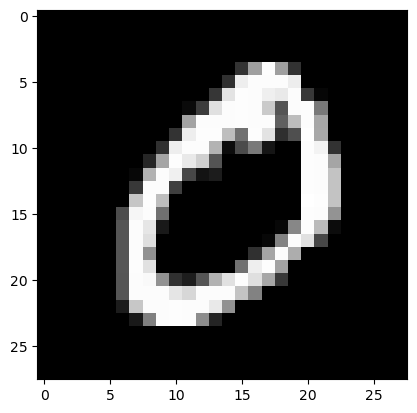

Labelled as 0


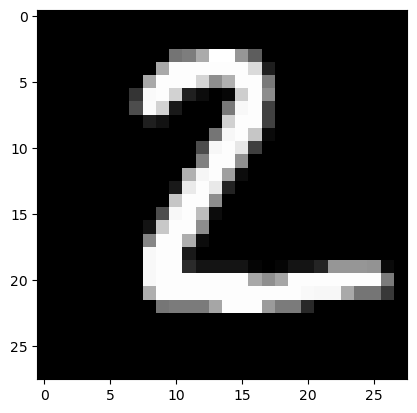

Labelled as 2


In [88]:
%matplotlib inline
import matplotlib.pyplot as plt

# Sanity check
def view_image(which, check_idx):
    plt.imshow(images[which][check_idx,:,:], cmap='gray')
    plt.show()
    print(f"Labelled as {labels[which][check_idx]}")

view_image(0, 1)
view_image(1, 1)